In [1]:
from models import *
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
showOriginalModelString = False

In [2]:
# calib_values = [5.28519191e+02, 6.26953644e+02, 1.19292094e+02, 1.32813964e+02,
# 	1.43334865e+02, 3.02457238e-05, 3.73841940e+02, 6.11737913e+02,
# 	2.21888434e+02]
# calib_values = [233.43812787, 920.72325095, 528.32410994, 809.07898991,
#        312.27659728, 653.13413407, 616.46751045, 369.26098092,
#          1.950896  ]
calib_values = np.genfromtxt('inferred_values.csv', delimiter=',')
def run_Mg():
	Mg_model.reset()
	initial_conditions(Mg_model,calib_values)
	return run(Mg_model,targets=PARAMS.targets,duration=PARAMS.duration)


def run_zhao():
	Zhao_2021.reset()
	return run(Zhao_2021,targets=PARAMS.targets,duration=PARAMS.duration)


In [3]:
zhao_results = run_zhao()
Mg_results = run_Mg()


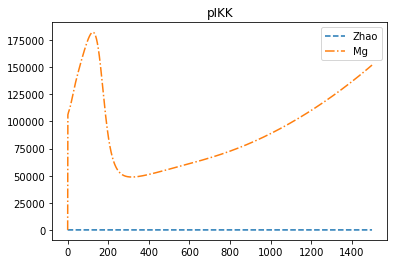

In [4]:
for tag in PARAMS.targets:
    fig = plt.figure()
    plt.plot(zhao_results[tag],label = 'Zhao',linestyle = '--')
    plt.plot(Mg_results[tag],label = 'Mg',linestyle = '-.')
    plt.legend()
    plt.title(tag)